# Data-driven predictive model for cooling tower performance

<u>Objective: </u> Create a data-driven predictive model based on time-series for the cooling tower efficiency. <br/>

<u>Abstract of the project:</u>
Heating Ventilation and Air Conditioning systems (HVACs) are used to control temperature and humidity inside buildings. They use cooling towers at one end to expel excess heat from the refrigerant into the atmosphere. The heat is expelled through evaporative cooling. <br/>
Cooling towers are used to expel heat from warm water coming out of water-cooled condensers in chiller units. The water has absorbed heat from the chiller’s refrigerant as it condenses. The rate of cooling depends on the cooling tower surface area, humidity, temperature, and speed of water and air. Cooling tower efficiency can be expressed as
$$
μ = (\frac{t_i  - t_o }{t_i  - t_w) })*100
$$
where
μ = cooling tower efficiency (%) <br/>
t_i  = inlet temperature of water to the tower ( o C,  o F) <br/>
t_o  = outlet temperature of water from the tower ( o C,  o F) <br/>
t_w  = wet bulb temperature of air ( ^o C,  ^o F) <br/>

The temperature difference between inlet and outlet water (t_i  - t_o ) is normally in the range 10 - 15  o F. The units should be consistent for the temperature.


## Load data

In [1]:
import pandas as pd
from pathlib import Path

# setup data directory
experiment_dir = Path('./data/results')
experiment_dir.mkdir(exist_ok=True)

In [2]:
df = pd.read_csv('./data/2621_Cooling_Tower_1.csv', index_col='time')
df.head()

,Cell_1bFan fanOnOff,Cell_1bFan fanStatus,Cell_1bFan vfdPercent,Cell_1bFan vfdPower,Cell_1aFan fanOnOff,Cell_1aFan fanStatus,Cell_1aFan vfdPercent,Cell_1aFan vfdPower,ESB_Tower_1 basinHeaterAlarm,ESB_Tower_1 bypassValveOpenClose,...,ESB_Tower_1 leavingWaterFlow,ESB_Tower_1 leavingWaterTemp,ESB_Tower_1 lowWaterLevelAlarm,ESB_Tower_1 makeupWaterConductivity,ESB_Tower_1 makeupWaterFlow,ESB_Tower_1 outdoorAirDryBulb,ESB_Tower_1 outdoorAirHumidity,ESB_Tower_1 outdoorAirWetBulb,ESB_Tower_1 waterConductivity,ESB_Tower_1 waterLevel
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 06:00:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,76.821442,51.510937,NaN,NaN
2019-01-01 06:05:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,77.292564,51.535805,NaN,NaN
2019-01-01 06:10:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,75.833458,51.318092,NaN,NaN
2019-01-01 06:15:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,75.666313,51.256962,NaN,NaN
2019-01-01 06:20:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,77.656372,51.601902,NaN,NaN


## Missing data imputation

In [3]:
# look at amount of missing data in each column
df.apply(pd.isnull).sum()/df.shape[0]

Cell_1bFan fanOnOff                            0.0
Cell_1bFan fanStatus                           0.0
Cell_1bFan vfdPercent                          0.0
Cell_1bFan vfdPower                            1.0
Cell_1aFan fanOnOff                            0.0
Cell_1aFan fanStatus                           0.0
Cell_1aFan vfdPercent                          0.0
Cell_1aFan vfdPower                            1.0
ESB_Tower_1 basinHeaterAlarm                   1.0
ESB_Tower_1 bypassValveOpenClose               0.0
ESB_Tower_1 coolingTowerEnable                 0.0
ESB_Tower_1 coolingTowerEnableTempSetPoint     1.0
ESB_Tower_1 coolingTowerLockoutTempSetPoint    1.0
ESB_Tower_1 enteringWaterFlow                  1.0
ESB_Tower_1 enteringWaterTemp                  0.0
ESB_Tower_1 highWaterLevelAlarm                1.0
ESB_Tower_1 leavingWaterFlow                   1.0
ESB_Tower_1 leavingWaterTemp                   0.0
ESB_Tower_1 lowWaterLevelAlarm                 1.0
ESB_Tower_1 makeupWaterConducti

Columns are either completely full or completely empty. So we can drop all empty columns.

In [4]:
df.dropna(axis=1, how="all", inplace=True)

In [5]:
# fix data types
df.index = pd.to_datetime(df.index, utc='True')
df.dtypes

Cell_1bFan fanOnOff                    bool
Cell_1bFan fanStatus                   bool
Cell_1bFan vfdPercent               float64
Cell_1aFan fanOnOff                    bool
Cell_1aFan fanStatus                   bool
Cell_1aFan vfdPercent               float64
ESB_Tower_1 bypassValveOpenClose       bool
ESB_Tower_1 coolingTowerEnable         bool
ESB_Tower_1 enteringWaterTemp       float64
ESB_Tower_1 leavingWaterTemp        float64
ESB_Tower_1 outdoorAirDryBulb       float64
ESB_Tower_1 outdoorAirHumidity      float64
ESB_Tower_1 outdoorAirWetBulb       float64
dtype: object

In [6]:
df['month'] = df.index.strftime('%Y-%m')
df

,Cell_1bFan fanOnOff,Cell_1bFan fanStatus,Cell_1bFan vfdPercent,Cell_1aFan fanOnOff,Cell_1aFan fanStatus,Cell_1aFan vfdPercent,ESB_Tower_1 bypassValveOpenClose,ESB_Tower_1 coolingTowerEnable,ESB_Tower_1 enteringWaterTemp,ESB_Tower_1 leavingWaterTemp,ESB_Tower_1 outdoorAirDryBulb,ESB_Tower_1 outdoorAirHumidity,ESB_Tower_1 outdoorAirWetBulb,month
time,,,,,,,,,,,,,,
2019-01-01 06:00:00+00:00,False,False,99.589935,False,False,99.589935,True,True,66.579277,67.951897,55.596096,76.821442,51.510937,2019-01
2019-01-01 06:05:00+00:00,False,False,99.589935,False,False,99.589935,True,True,65.755974,67.951897,55.596096,77.292564,51.535805,2019-01
2019-01-01 06:10:00+00:00,False,False,99.589935,False,False,99.589935,True,True,65.364723,67.951897,55.596096,75.833458,51.318092,2019-01
2019-01-01 06:15:00+00:00,False,False,99.589935,False,False,99.589935,True,True,67.249046,67.951897,55.596096,75.666313,51.256962,2019-01
2019-01-01 06:20:00+00:00,False,False,99.589935,False,False,99.589935,True,True,63.985386,67.951897,55.596096,77.656372,51.601902,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 05:35:00+00:00,True,True,0.000000,True,True,0.000000,True,True,65.024918,67.990540,42.361458,46.367363,34.826103,2020-01
2020-01-01 05:40:00+00:00,False,False,0.000000,False,False,0.000000,True,True,64.411736,67.990540,42.361458,46.831158,34.796047,2020-01
2020-01-01 05:45:00+00:00,True,True,0.934546,True,True,0.934546,True,True,65.337555,67.990540,42.063175,47.062832,34.699188,2020-01


All data types are correct already.

## Exploratory data analysis
Visualization and outlier removal

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from statistics import mean


In [8]:
df.describe()

,Cell_1bFan vfdPercent,Cell_1aFan vfdPercent,ESB_Tower_1 enteringWaterTemp,ESB_Tower_1 leavingWaterTemp,ESB_Tower_1 outdoorAirDryBulb,ESB_Tower_1 outdoorAirHumidity,ESB_Tower_1 outdoorAirWetBulb
count,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000
mean,35.697364,35.697717,72.212080,69.485519,63.384678,62.180180,55.167784
std,46.703482,46.703268,7.214412,5.226963,17.696170,19.742004,14.895606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,67.733768,66.164246,48.980747,46.242802,43.115774
50%,0.000000,0.000000,70.858467,68.119827,64.833214,62.475151,57.063919
75%,100.000000,100.000000,77.584534,73.793045,77.360619,78.438663,69.104118
max,100.000000,100.000000,91.269211,89.454002,100.139587,98.166000,81.819206


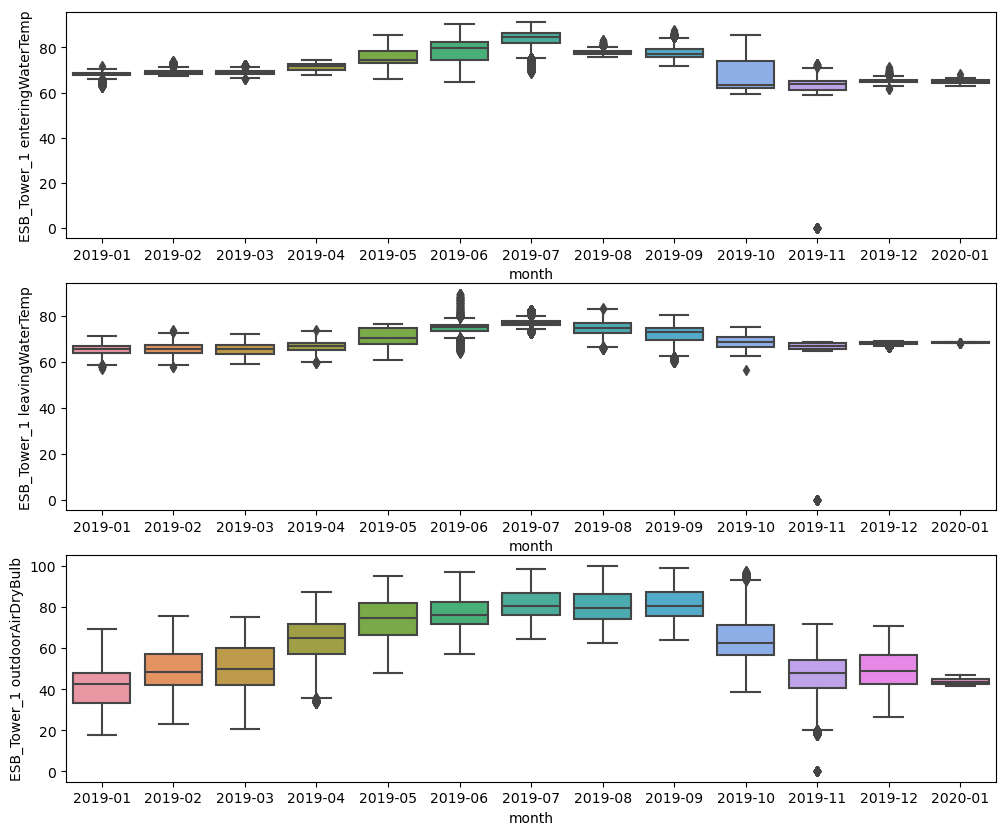

In [9]:
# df_on = df[df['Cell_1aFan fanOnOff'] | df['Cell_1bFan fanOnOff']]

fig, ax = plt.subplots(3)
fig.set_size_inches((12,10))
sns.boxplot(x='month',y='ESB_Tower_1 enteringWaterTemp', data=df,ax=ax[0])
sns.boxplot(x='month',y='ESB_Tower_1 leavingWaterTemp', data=df,ax=ax[1])
sns.boxplot(x='month',y='ESB_Tower_1 outdoorAirDryBulb', data=df,ax=ax[2])

plt.show()

The only outliers that must be dealth with lie around 0F in 2019-11.

In [10]:
df = df.drop(df[df['ESB_Tower_1 enteringWaterTemp'] == 0].index)

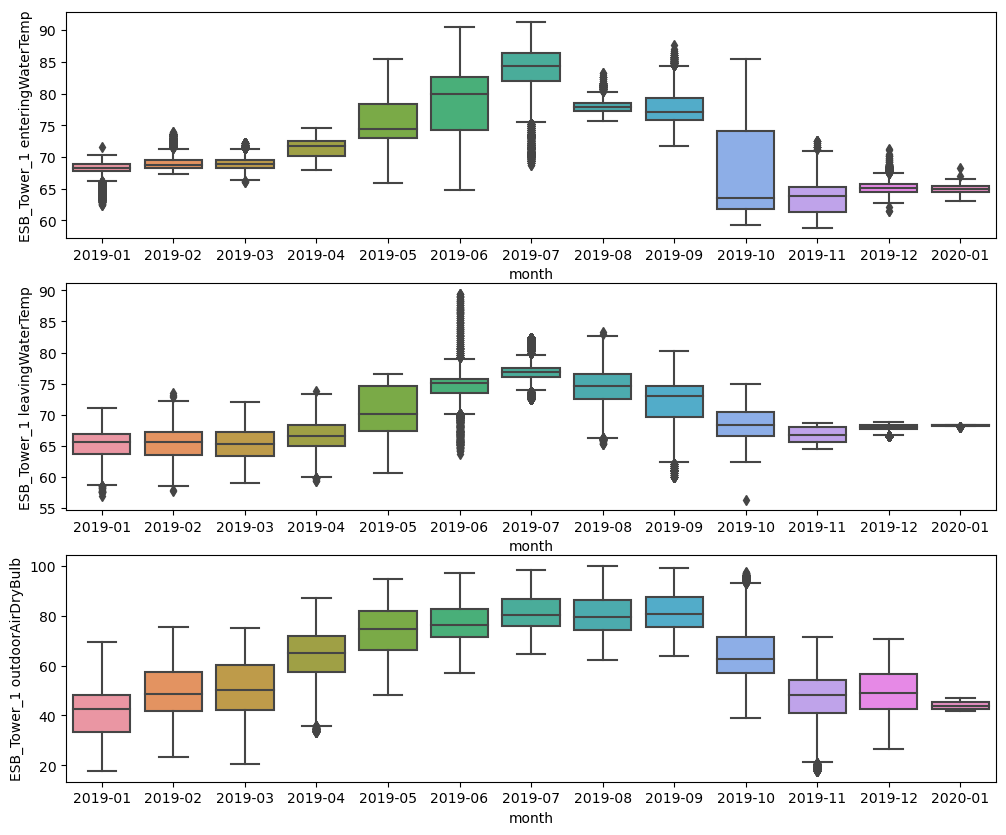

In [11]:
# df_on = df[df['Cell_1aFan fanOnOff'] | df['Cell_1bFan fanOnOff']]

fig, ax = plt.subplots(3)
fig.set_size_inches((12,10))
sns.boxplot(x='month',y='ESB_Tower_1 enteringWaterTemp', data=df,ax=ax[0])
sns.boxplot(x='month',y='ESB_Tower_1 leavingWaterTemp', data=df,ax=ax[1])
sns.boxplot(x='month',y='ESB_Tower_1 outdoorAirDryBulb', data=df,ax=ax[2])

plt.show()

## Efficiency
Compute the cooling tower efficiency as a performance metric for the system and analyze the behavior (smoothness, noise, continuity, multimodality, and monotonicity) <br>

Calculating efficiency as (temperature in at current time – temperature out at next time) * 100 / (temperature in at current time – wet bulb temperature average between two times)

In [12]:
df['ESB_Tower_1 nextLeavingWaterTemp'] = df['ESB_Tower_1 leavingWaterTemp'].shift(periods=-1)

df_nextWetBulbAverage = df['ESB_Tower_1 outdoorAirWetBulb'].shift(periods=-1)
df_nextWetBulbAverage = (df_nextWetBulbAverage + df['ESB_Tower_1 outdoorAirWetBulb'] ) / 2

df['ESB_Tower_1 nextWetBulbAverage'] = df_nextWetBulbAverage

df.drop(df.index[-1], inplace=True)

In [13]:
df['efficiency'] = abs((df['ESB_Tower_1 enteringWaterTemp'] - df['ESB_Tower_1 nextLeavingWaterTemp']) * 100
                       /(df['ESB_Tower_1 enteringWaterTemp'] -  df['ESB_Tower_1 nextWetBulbAverage']) )

Remove outliers from efficiency.

In [15]:
# remove outliers: any value 1.5*IQR above the third qaurtile or 1.5*IQR below the first quartile
def remove_outliers(column_name, df=df, multiplier=1.5):
    Q1=df[column_name].quantile(0.25)
    Q3=df[column_name].quantile(0.75)
    IQR=Q3-Q1

    lower_lim = Q1- multiplier * IQR
    upper_lim = Q3 + multiplier * IQR
    print(lower_lim)
    print(upper_lim)
    
    df = df[(df[column_name] >= lower_lim) & (df[column_name] <= upper_lim)]
    return df

In [16]:
df = remove_outliers('efficiency')

-51.35199278726523
120.32350644606669


##### Smoothness

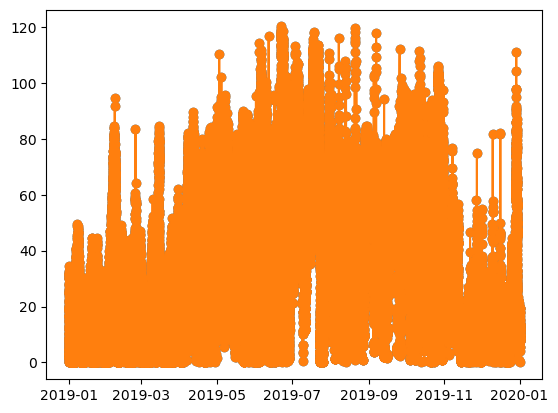

In [21]:
plt.plot_date(df.index, df['efficiency'])
plt.plot(df.index, df['efficiency'], '-o')

plt.show()

/var/folders/s1/s_t_60lx7k9b3wnl42xmt64r0000gp/T/ipykernel_53581/2196760418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['efficiency_rolling_mean'] = df.loc[:,'efficiency'].rolling(window_size).mean()


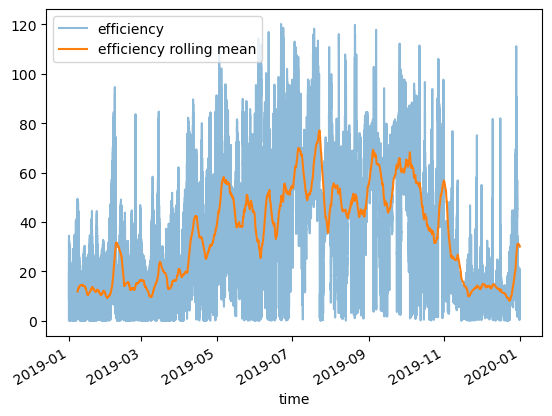

In [22]:
# Calculate the rolling average for each column
window_size = 12*24*7 # window size is number of observations in a week
df['efficiency_rolling_mean'] = df.loc[:,'efficiency'].rolling(window_size).mean()

# Plot the rolling average as a line plot
df['efficiency'].plot(kind='line', alpha=0.5, label='efficiency')
df['efficiency_rolling_mean'].plot(kind='line', label='efficiency rolling mean')
plt.legend()
plt.show()

##### Multimodality

Visualizing distribution of efficiency values through a histogram to check for multimodality.

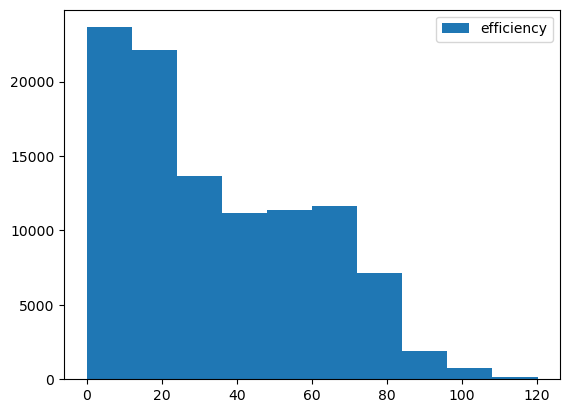

In [23]:
plt.hist(df['efficiency'], bins=10, label='efficiency')
plt.legend()
plt.show()

Efficiency is unimodal.

#### Continuity

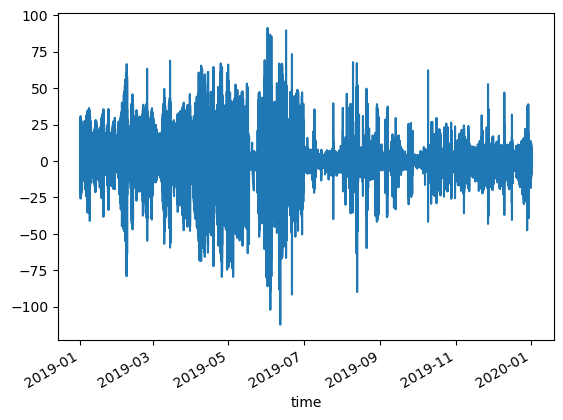

In [24]:
# Plot the difference between each consecutive value in each column
difference = df['efficiency'].diff()

# Plot the difference as a line plot
difference.plot(kind='line')

plt.show()

<div style='color: red'>

FIXME:

Efficiency shouldn't be > 100, but I'm still getting many non-outliers in the 100-120 range. Am I supposed to be taking some other difference in the denominator?

While plotting the data and identifying outliers, should I only consider the times when the fans are on?

Do I have to convert to Kelvin for the calculations?

How do I interpret the monthly boxplot? I know it's showing outliers but there are so many outliers that according to the plot that maybe I'm interpreting something wrong. 

Would fan being on or off be considered a confounding variable?
</div>

## Next Task: Predictive Model

Create a set of data-driven predictive models for the temperature of the water exiting the cooling tower and going to the condenser with different time horizons: 1 h, 6 h, 12 h, 24 h (this variable determines the cooling tower efficiency).

In [25]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [26]:
random_seed = 1
np.random.seed(random_seed)

In [27]:
print('Number of features = %d' % df.shape[1])
print('Number of rows = %d' % df.shape[0])

Number of features = 18
Number of rows = 103500


In [28]:
# Adding more predictors
df['water_temp_change'] = df['ESB_Tower_1 leavingWaterTemp'] - df['ESB_Tower_1 enteringWaterTemp']

/var/folders/s1/s_t_60lx7k9b3wnl42xmt64r0000gp/T/ipykernel_53581/2840610788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['water_temp_change'] = df['ESB_Tower_1 leavingWaterTemp'] - df['ESB_Tower_1 enteringWaterTemp']


In [29]:
# setting target and features
target_name = 'ESB_Tower_1 leavingWaterTemp'
target_df = df.loc[:, target_name]

feature_names = ['ESB_Tower_1 enteringWaterTemp', 'ESB_Tower_1 outdoorAirHumidity', 'ESB_Tower_1 outdoorAirDryBulb', 'ESB_Tower_1 outdoorAirWetBulb', 'Cell_1aFan vfdPercent', 'water_temp_change']
features_df = df[feature_names]

In [30]:
# save features and targets to experiment directory
features_df.to_csv(experiment_dir / 'prepared_features.csv')
target_df.to_csv(experiment_dir / 'prepared_targets.csv')